<a href="https://colab.research.google.com/github/paulcesarbaruk/Analsying-the-Salary-of-Data-Scientists/blob/main/C%C3%B3pia_de_%5BAWARI_DS_11_02%5D_Pr%C3%A1tica_Machine_Learning_com_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

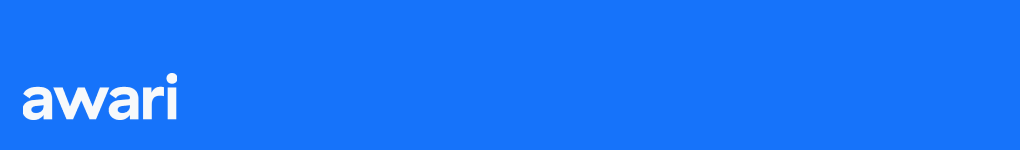

Prática da **Aula 11: Machine Learning I**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Machine Learning com Titanic**

## **Objetivo**

Nesta prática, voltamos a utilizar o dataset do naufrágio do Titanic, que já vimos ao longo do curso.

Aqui, porém, além de análise exploratório dos dados, implementaremos modelos de Machine Learning para tentar prever quais as chances de sobrevivência de uma passageira qualquer.

Basicamente, estamos interessandos em responder as seguintes perguntas:

* Será que alguns grupos de passageiros tiveram mais "sorte" que outros?

* Mulheres e crianças tiveram mais chances de sobreviver?

* Alguns passageiros foram menos favorecidos por terem embarcado na 3ª Classe?

## **Prática**

### **Preparativos**

Vamos importar as bibliotecas e os conjuntos de dados. Neste caso, usaremos o dataset de passageiros divididos em outros dois:

* **Conjunto de treino (train.csv):** composto por diversas informações sobre os passageiros, como gênero, classe de embarque, idade, etc. Esse conjunto também deve ser usado para construir e treinar o modelo de Machine Learning, nele é informado se o passageiro sobreviveu ou não.

* **Conjunto de teste (test.csv):** este dataset não informa se o passageiro sobreviveu ou não, e deve ser usado como dados nunca vistos pelo modelo, de forma a verificar o desempenho do mesmo.

In [ ]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
paleta_cores = ["#34495e", "#5497B0", "#89B7D0"]
sns.set(style = "dark", palette = paleta_cores, color_codes = True)

In [ ]:
# Obtendo os conjuntos de dados
treino = pd.read_csv('https://raw.githubusercontent.com/jeffersonverissimo/datasets/master/titanic/train.csv')
teste =  pd.read_csv('https://raw.githubusercontent.com/jeffersonverissimo/datasets/master/titanic/test.csv')

### **Análise exploratória**

Vamos fazer uma análise exploratória dos dados que usaremos para entendê-los melhor. Esta etapa quase sempre sucede a implementação de modelos de Machine Learning.

In [ ]:
# Visilizando dados de treino
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As variáveis, caso seja necessário relembrá-las, significam:

* **PassengerID:** número de identificação do passageiro;
* **Survived:** informa se o passageiro sobreviveu ao naufrágio:
 * 0 = não;
 * 1 = sim;
* **PCclass:** classe do bilhete:
 * 1 = 1ª classe;
 * 2 = 2ª classe;
 * 3 = 3ª classe;
* **Name:** nome do passageiro;
* **Sex:** sexo do passageiro;
* **Age:** idade do passageiro;
* **SibSp:** quantidade de cônjuges e/ou irmãos a bordo;
* **Parch:** quantidade de pais e filhos a bordo;
* **Ticket:** número da passagem;
* **Fare:** preço da passagem;
* **Cabin:** número da cabine do passageiro;
* **Embarked:** porto de embarque:
 * C = Cherbourg;
 * Q = Queenstown;
 * S = Southampton;

#### **Respondendo perguntas básicas**

**Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui?**

In [ ]:
print('Colunas:', treino.shape[1])
print('Linhas:', treino.shape[0])

Colunas: 12
Linhas: 891


**Quais os tipos das variáveis?**

In [ ]:
treino.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

O conjunto de dados contém 7 variáveis numéricas e 5 do tipo *object*, estas últimas são *strings*, como pudemos observar nas primeiras linhas do *dataset*.

**Há dados faltantes no *dataset*?**

In [ ]:
treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Três variáveis possuem valores ausentes, `Age`, `Cabin` e `Embarked`. Como já fizemos anteriormente, precisamos tratar estes casos.

**Qual a distribuição estatística dos dados?**

In [ ]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Acima, podemos ver o resumo dos principais parâmetros estatísticos do nosso conjunto de dados. Nele, são apresentados valores de média, mediana, desvio padrão, etc. O resumo se refere apenas às variáveis numéricas.

Mais precisamente, as variáveis que realmente importam no caso são `Pclass`, `Age`, `SibSb`, `Parch` e `Fare`, uma vez que `PassengerID` e `Survived` identificam o número do passageiro e se ele sobreviveu ao desastre, respectivamente.

**Existem *outliers* no conjunto de dados?**

É fundamental sabermos identificar a presença de *outliers* no *dataset*, dados que se diferenciam muito dos outros, ou seja, são valores que fogem da normalidade. Eles podem influenciar drasticamente uma determinada análise realizada no *dataset*, causando problemas nos resulados obtidos.

Graficamente, os *outliers* podem ser identificados através de histogramas ou usando o **boxplot**, e é isso que será feito em seguida.

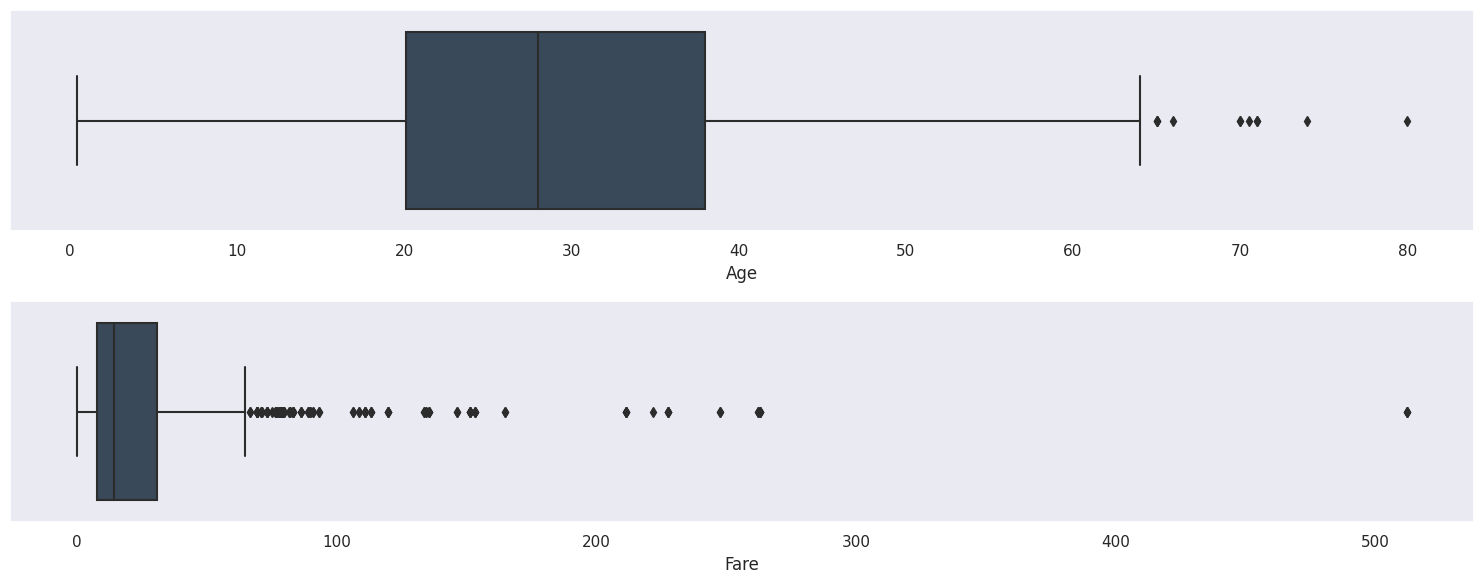

In [ ]:
fig, (axis1, axis2) = plt.subplots(2,1, figsize = (15,6))
sns.boxplot(data = treino, x = 'Age', ax = axis1)
sns.boxplot(data = treino, x = 'Fare', ax = axis2)

plt.tight_layout()

Acima, podemos perceber que existem *outliers* presentes no conjunto de dados. Mais especificamente, os gráficos mostram esses resultados para as variáveis `Age` e `Fare`. Precisamos tratar esses dados também.

Após extrairmos algumas informações iniciais do conjunto de dados, podemos partir para questionamentos mais específicos, relacionados diretamente à chance de sobrevivência de um determinado grupo de passageiros, considerando classe de embarque, sexo, idade, etc.

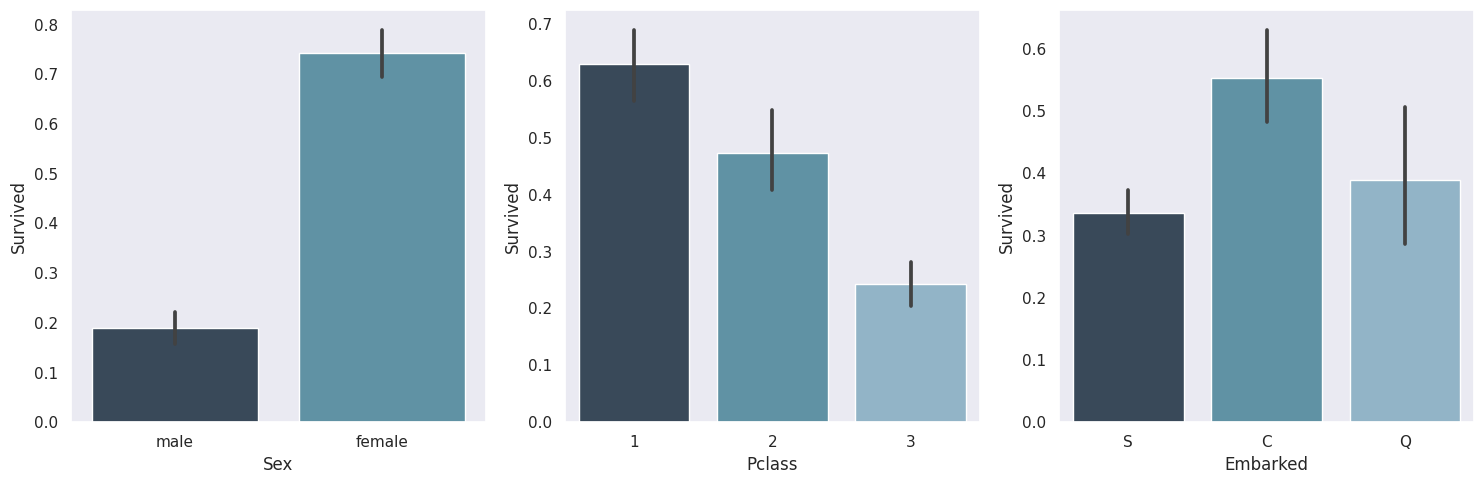

In [ ]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (15,5))

sns.barplot(data = treino, x = 'Sex', y = 'Survived', ax = axis1)
sns.barplot(data = treino, x = 'Pclass', y = 'Survived', ax = axis2)
sns.barplot(data = treino, x = 'Embarked', y = 'Survived', ax = axis3)

plt.tight_layout()

A partir da análise dos três gráficos acima, podemos extrair duas informações importantes:

* As mulheres têm muito mais chances de sobreviverem do que os homens, enquanto elas possuem cerca de **75%** de chances, os homens apresentam cerca de **18%**.

* Os passageiros que viajaram na **1ª Classe** possuem mais que o dobro de chances de sobreviverem em relação aos que compraram a **3ª Classe**.

* Os passageiros que embarcaram a partir da cidade de **Cherbourg** são os que mais têm chances de sobreviverem, enquanto os que embarcaram em **Southampton**, possuem as menores chances.

As probabilidades de sobrevivência das mulheres no desastre do Titanic se estestem para todos os casos individuais, para todas as classes de viagem e cidades de embarque, como podemos observar nos gráficos abaixo.

<ipython-input-10-135c5d9cdfc7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x = "Sex", y = "Survived", col = "Pclass", data = treino, saturation = .5, kind = "bar", ci = None, aspect = 0.8)
<ipython-input-10-135c5d9cdfc7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x = "Sex", y = "Survived", col = "Embarked", data = treino, saturation = .5, kind = "bar", ci = None, aspect = 0.8)


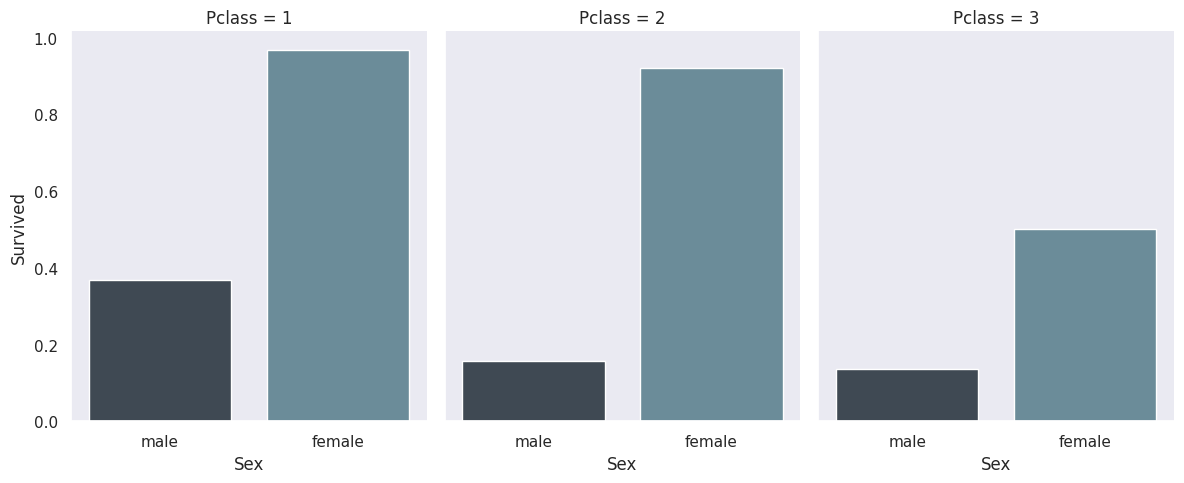

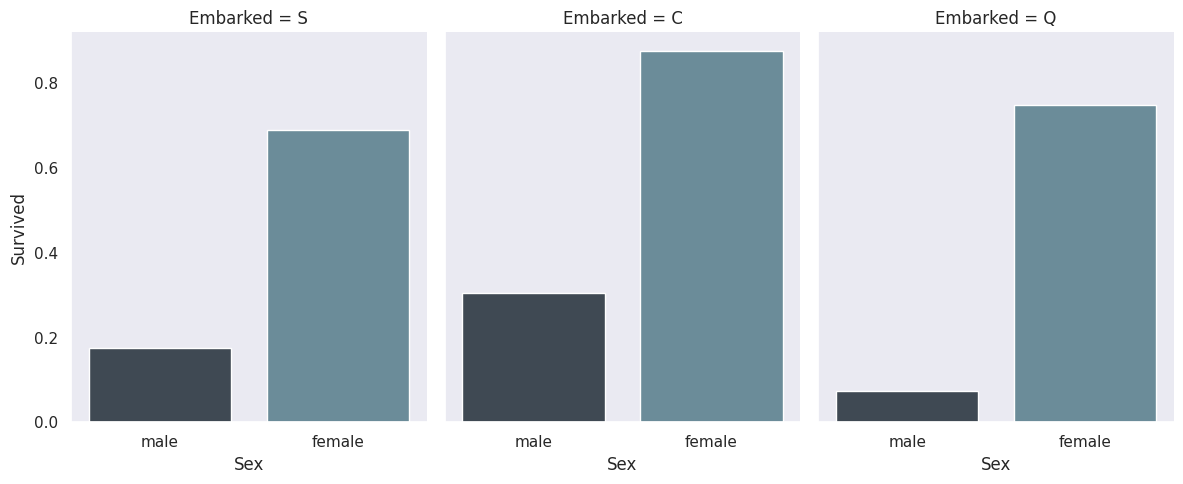

In [ ]:
sns.catplot(x = "Sex", y = "Survived", col = "Pclass", data = treino, saturation = .5, kind = "bar", ci = None, aspect = 0.8)
sns.catplot(x = "Sex", y = "Survived", col = "Embarked", data = treino, saturation = .5, kind = "bar", ci = None, aspect = 0.8)

plt.tight_layout()

Também podemos realizar a análise em relação às idades dos passageiros e saber quais tiveram mais chances de sobreviver.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


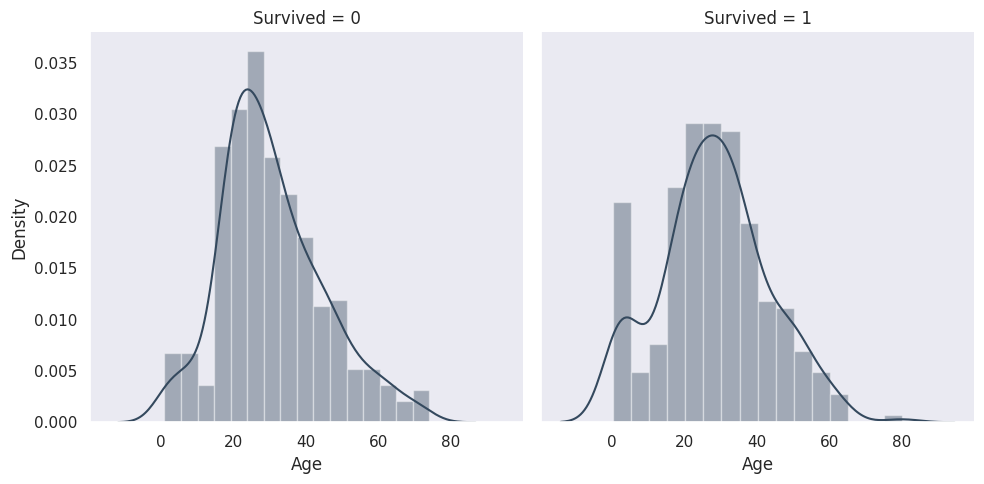

In [ ]:
sns.FacetGrid(treino, col = 'Survived', height = 5).map(sns.distplot, 'Age')

plt.tight_layout()

Os gráficos acima mostram a distribuição de idades para os sobreviventes e mortes no naufrágio, podemos perceber que a maior parte dos passageiros, nas duas situações, possuem idades entre 20 e 30 anos.

No gráfico da direita (sobreviventes), podemos perceber que há um pico nos passageiros que possuem idade de até 5 anos, mostrando que crianças um pouco menores têm mais chances de sobreviver.


**Qual a correlação entre as variáveis do *dataset*?**

Através do gráfico a seguir, podemos entender a correlação entre as variáveis, se é positiva ou negativa:

<ipython-input-12-e1e888c50d87>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(treino.corr(), fmt = '.2g', cmap = 'Purples', annot= True)


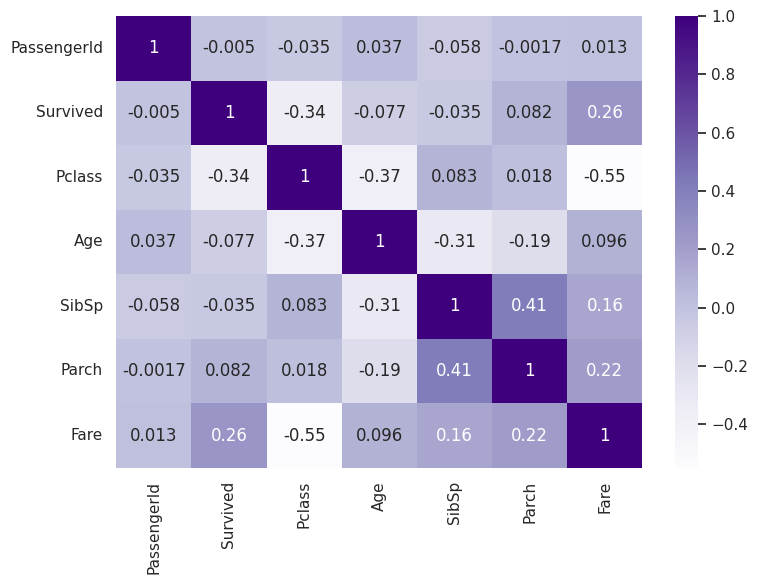

In [ ]:
# colormap = sns.diverging_palette(220, 10, as_cmap = True)

fig, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(treino.corr(), fmt = '.2g', cmap = 'Purples', annot= True)
plt.tight_layout()

As maiores correlações apresentadas foram entre as variáveis `Parch` (quantidade de pais e filhos a bordo) e `SibSp` (quantidade de cônjuges e irmãos a bordo), cujo valor é de 0,41.

Ao final dessa análise exploratória, foi possível entender melhor os dados e como eles se comportam, extraindo informações que serão importantes ao implementar o modelo de machine learning, pois será mais fácil escolher as melhores variáveis para melhorar o desempenho do modelo.

### **Modelo de Machine Learning**

O modelo preditivo a ser implementado após a análise exploratória será de Aprendizado Supervisionado.

Com base nisso e nas descrições das colunas do dataset, é fácil identificar que a coluna Survived é a variável alvo (target).

Agora que já sabemos o comportamento geral dos dados, podemos prepará-los para construir o modelo de ML, selecionando as melhores *features* (variáveis) e limpando os dados necessários.

Neste projeto, serão implementados modelos de classificação, pois procuramos saber quais passageiros sobreviveram ou não ao naufrágio.

Mais especificamente, implementaremos modelos de Regressão Logística, Árvore de Decisão e Máquina de Vetor de Suporte (SVM). Os desempenhos de cada modelo serão analisados e comparados considerando as devidas métricas para modelos de classificação.

Por fim, é facultativo [submeter os resultados à competição do Kaggle](https://www.kaggle.com/competitions/titanic) e verificar o *score* (pontuação) alcançado.

#### **Preparação dos Dados**

Nesta etapa, devemos nos preocupar em fazer os ajustes finais dos dados e tratá-los para alimentar o modelo. Esses ajustes envolver a seleção das *features*, criação de novas variáveis, limpeza dos dados, separação do dataset etc.

##### **Organizando os datasets**

Apesar de os datasets de treino e testes estarem inicialmente separados, uma boa prática é juntá-los em um único dataset para poder aplicar as devidas alterações e depois separá-los novamente. Isso, além de importante, oferece praticidade, pois as mudanças precisam ser as mesmas para os dois conjuntos de dados.

In [ ]:
# SALVANDO OS ÍNDICES PARA RECUPERAÇÃO DOS CONJUNTOS DE DADOS
treino_ID = treino.shape[0]
teste_ID = teste.shape[0]

In [ ]:
# SALVANDO VARIÁVEL ALVO (TARGET) E SEPARANDO DO DATASET DE TREINO
target = treino['Survived'].copy()
treino.drop(['Survived'], axis = 1, inplace = True)

In [ ]:
# JUNTANDO OS CONJUNTOS DE DADOS
df_total = pd.concat(objs = [treino, teste], axis = 0).reset_index(drop = True)

In [ ]:
# TAMANHO DO NOVO DATASET
df_total.shape

##### **Selecionando as principais variáveis**

Nessa etapa, é fundamental selecionarmos as variáveis que realmente são relevantes para a construção do modelo.

Contudo, vale ressaltar que nem sempre fazemos as melhores escolhas ao selecionar as *features*, sendo preciso repensar e avaliar novamente a significância das variáveis.

Neste projeto, serão consideradas apenas as variáveis `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`, `Embarked`.

Assim, as demais variáveis serão descartadas daqui em diante, por não serem relevantes.

In [ ]:
# REMOVENDO AS VARIÁVEIS IRRELEVANTES
df_total.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
# RESUTLADO
df_total.head()

##### **Tratando valores ausentes**

Como comentado anteriormente, a presença de valores faltantes no conjunto de dados influencia diretamente as análises exploratória e o aprendizado dos modelos. Desta forma, precisamos tratar esses dados adotando alguns métodos, como, por exemplo, excluindo esses valores ou substituindo-os por outros que possivelmente representem bem esses dados.

In [ ]:
df_total.isnull().sum()

Podemos perceber pela imagem acima que a maior quantidade de dados faltantes está presente na variável `Age` e, como visto anteriormente, essa coluna também possui outliers.

As colunas `Fare` e `Embarked` também apresentam valores faltantes, mas insignificantes, em quantidade, quando comparados à variável `Age`.

Neste trabalho, serão utilizados os valores das medianas para substituir os dados ausentes das variáveis `Age` e `Fare`, enquanto para  `Embarked` será usado o valor mais frequente.

In [ ]:
# MEDIANA DA COLUNA 'AGE'
Age_mediana = df_total['Age'].median()
df_total['Age'].fillna(Age_mediana, inplace = True)

# MEDIANA DA COLUNA 'FARE'
Fare_mediana = df_total['Fare'].median()
df_total['Fare'].fillna(Fare_mediana, inplace = True)

# VERIFICANDO O VALOR MAIS FREQUENTE DA COLUNA 'EMBARKED'
df_total['Embarked'].mode()

# SUBSTITUINDO O VALOR
df_total['Embarked'].fillna('S', inplace = True)

In [ ]:
# VERIFICANDO O RESULTADO DAS SUBSTITUIÇÕES
df_total.isnull().sum()

##### **Ajustando as variáveis para o modelo**

Após tratar os dados ausentes, o tratamento dos dados está praticamente concluído. Agora, é preciso converter os dados que irão alimentar o modelo de categóricos para numéricos.

Neste caso, as variável `Sex` e `Embarked` serão convertidas para valores numéricos.

In [ ]:
# TRANSFORMANDO AS VARIÁVEIS PARA NUMÉRICAS
df_total['Sex'] = df_total['Sex'].map({'male' : 1, 'female' : 0})

df_total['Embarked'] = df_total['Embarked'].astype('category')
df_total['Embarked'] = df_total['Embarked'].cat.codes

In [ ]:
# VISUALIZANDO O RESUTLADO
df_total.head()

Outra opção seria tratar as variáveis usando o [`One Hot Encoding`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) do Scikit-learn para converter as variáveis para numéricas.


##### **Recuperando os conjuntos de treino e teste**

Depois de aplicar as devidas alterações nos conjuntos de dados, podemos separá-los novamente e obter os dados de treino e teste a partir do índice que salvamos no início: treino_ID e teste_ID.

In [ ]:
# SEPARANDO OS CONJUNTOS DE DADOS
treino = df_total.iloc[:treino_ID]
teste = df_total.iloc[treino_ID:]

In [ ]:
# VISUALIZANDO RESULTADOS
display(treino.head())
display(teste.head())

#### **Implementação do modelo**

Esta etapa costuma ser mais rápida de ser realizada, justamente porque a maior parte do tempo foi investido na análise exploratória e tratamento dos dados.

Outro fator, é que a implementação dos modelos de Machine Learning são muito automatizados, sendo necessário apenas algumas linhas de código para treinar, testar e avaliar o modelo.

Como citado anteriormente, serão implementados os modelos de Regressão Logística, Árvore de Decisão e Máquina de Vetor de Suporte (SVM). Para esta finalidade, será utilizada a biblioteca Scikit-Learn.

##### **Regressão Logística**

In [ ]:
# IMPORTAÇÃO DO MODELO
from sklearn.linear_model import LogisticRegression

# INSTANCIANDO O MODELO
LR_model = LogisticRegression(solver = 'liblinear')

# TREINANDO O MODELO
LR_model.fit(treino, target)

In [ ]:
# PREDIÇÃO DO MODELO
y_pred_LR = LR_model.predict(teste)

In [ ]:
# ACURÁCIA DO MODELO
acc_logReg = round(LR_model.score(treino, target)*100, 2)
print('Acurácia RL: ', acc_logReg)

##### **Árvore de Decisão**

In [ ]:
# IMPORTAÇÃO DO MODELO
from sklearn.tree import DecisionTreeClassifier

# INSTANCIANDO O MODELO
DT_model = DecisionTreeClassifier(max_depth = 3)

# TREINANDO O MODELO
DT_model.fit(treino, target)

In [ ]:
# PREDIÇÃO DO MODELO

y_pred_DT = DT_model.predict(teste)

In [ ]:
# ACURÁCIA DO MODELO

acc_tree = round(DT_model.score(treino, target)*100, 2)

print('Acurácia DT: ', acc_tree)

##### **Máquina de Vetor de Suporte**

In [ ]:
# IMPORTAÇÃO DO MODELO
from sklearn import svm

# INSTANCIANDO O MODELO
SVM_model = svm.SVC(C = 1, kernel = 'linear')

# TREINAMENTO DO MODELO
SVM_model.fit(treino, target)

In [ ]:
# ACURÁCIA DO MODELO
acc_svm = round(SVM_model.score(treino, target)*100, 2)
print('Acurácia DT: ', acc_svm)

In [ ]:
y_pred_SVM = SVM_model.predict(teste)

##### Comparação

O modelo que apresentou o melhor resultado foi o de Árvore de Decisão, com acurácia de 82.72

É importante ressaltar que este foram modelos iniciais e que várias alterações podem ser feitas para melhorá-los.

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**